In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('moviesdataset_2023.csv')
data

,Unnamed: 0,name,rating,votes,runtime,genre,description
0,0,Oppenheimer,8.4,"565,499",180 min,"['Biography, Drama, History']",['The story of American scientist J. Robert Op...
1,1,Sound of Freedom,7.7,"91,802",131 min,"['Biography, Crime, Drama']",['The incredible true story of a former govern...
2,2,Saltburn,7.3,"38,572",131 min,"['Comedy, Drama, Thriller']","[""A student at Oxford University finds himself..."
3,3,Tetris,7.4,"75,645",118 min,"['Biography, Drama, History']","[""The story of how one of the world's most pop..."
4,4,Jesus Revolution,7.1,"12,613",120 min,['Drama'],['The true story of a national spiritual awake...
...,...,...,...,...,...,...,...
95,95,The Pope's Exorcist,6.1,"76,775",103 min,"['Horror, Thriller']","[""Follow Gabriele Amorth, the Vatican's leadin..."
96,96,Creed III,6.7,"87,908",116 min,"['Drama, Sport']",['Adonis has been thriving in both his career ...
97,97,Kidnapped,7.1,"1,855",134 min,"['Drama, History']",['A Jewish boy is kidnapped and converted to C...
98,98,Fast X,5.8,"106,548",141 min,"['Action, Adventure, Crime']",['Dom Toretto and his family are targeted by t...


In [30]:
# ratings

ratings =data['rating']
data['rating'] = pd.to_numeric(data['rating'])
mean_ratings = data['rating'].mean()
print("Mean Rating:", mean_ratings)


# PRINTING MOVIE NAME WITH IT'S RUNTIME WITH MAXIMUM RUNTIME
import re
import pandas as pd

runtime_column = data['runtime']
movie_column = data['name']

runtime = []
movie_names = []

for runtime_val, movie_name in zip(runtime_column, movie_column):
    extracted_numbers = list(map(int, re.findall(r'\d+', str(runtime_val))))
    
    if extracted_numbers:
        runtime.append(max(extracted_numbers))
        movie_names.append(movie_name)

df_result = pd.DataFrame({'Movie_Name': movie_names, 'Runtime': runtime})

if not df_result.empty:
    max_row = df_result.loc[df_result['Runtime'].idxmax()]
    print("Movie with Maximum Runtime:")
    print(max_row)
else:
    print("No numbers found")


Mean Rating: 6.885567010309278
Movie with Maximum Runtime:
Movie_Name    Killers of the Flower Moon
Runtime                              206
Name: 30, dtype: object


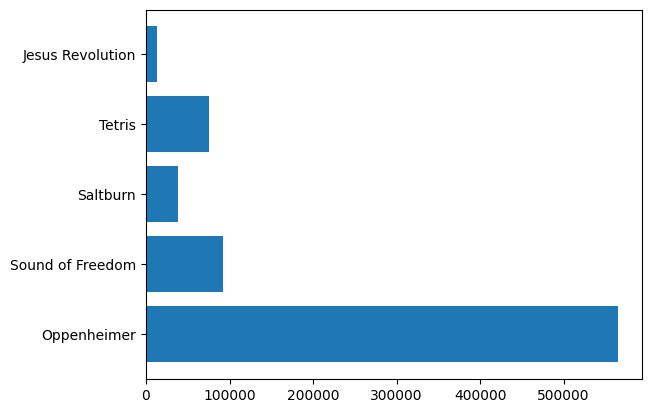

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
100 100
['Biography, Drama, History', 'Biography, Crime, Drama', 'Comedy, Drama, Thriller', 'Biography, Drama, History', 'Drama', 'Crime, Drama', 'Action, Sci-Fi, Thriller', 'Comedy, Music, Romance', 'Biography, Comedy, Drama', 'Drama, Sport', 'Action, Drama, Thriller', 'Comedy, History', 'Drama, Romance', 'Comedy, Romance', 'Crime, Drama, Thriller', 'Action, Drama, War', 'Crime, Drama, Thriller', 'Comedy, Drama', 'Action, Adventure, Drama', 'Drama', 'Animation, Action, Adventure', 'Action, War', 'Biography, Drama, Sport', 'Comedy, Drama, Sport', 'Horror, Sci-Fi, Thriller', 'Action, Crime, Drama', 'Action, Adventure, History', 'Crime, Drama', 'Action, Adventure, History', 'Biography, Comedy, Drama', 'Crime, Drama, History', 'Action, Adventure, Comedy', 'Action, Adventure, Thriller', 'Drama, Mystery, Thriller', 'Action, Crime, Thriller', 'Action, Crime, Thriller', 'Horror', 'Crime, Drama, Mystery', 'Action, Adventur

([<matplotlib.patches.Wedge at 0x2196842aff0>,
 [Text(1.0885451682963978, 0.15833324533580143, 'Biography'),
  Text(0.6917378270382225, 0.8552770186579541, 'Drama'),
  Text(-0.04632776601815183, 1.099023993412231, 'History'),
  Text(-0.40715193953216555, 1.0218744042861607, 'Crime'),
  Text(-0.8757023583064643, 0.6656916550900253, 'Comedy'),
  Text(-1.0996812714278585, 0.02647831699350225, 'Thriller'),
  Text(-0.8340772830471279, -0.717157643691205, 'Action'),
  Text(-0.3699944379885161, -1.035907387683649, 'Sci-Fi'),
  Text(-0.2686827600315291, -1.0666815712581894, 'Music'),
  Text(-0.15177916855539644, -1.0894783540725501, 'Romance'),
  Text(0.0066201449129054185, -1.0999800787656713, 'Sport'),
  Text(0.08597497973758697, -1.0966349907143769, 'War'),
  Text(0.4678779320232177, -0.9955351529331736, 'Adventure'),
  Text(0.8165727450035075, -0.737027104058892, 'Animation'),
  Text(0.9493005928541571, -0.5557232984199474, 'Horror'),
  Text(1.0505709997609678, -0.326037688712886, 'Mystery

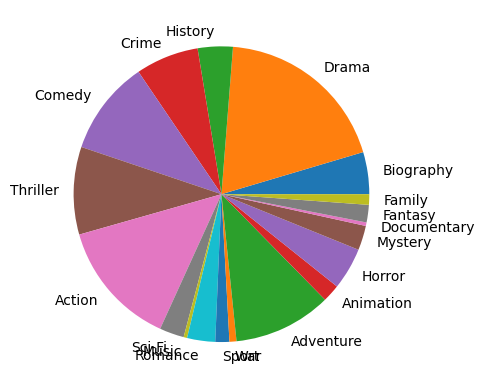

In [114]:
# VISUALISATION
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data['votes'] = pd.to_numeric(data['votes'].astype(str).str.replace(',', ''), errors='coerce')
Votes_column = data['votes']
Votes = Votes_column.head()

data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
ratings_column = data['rating']
ratings = ratings_column.head()

movie_column = data['name']
movie = movie_column.head()



plt.barh(movie, Votes)
plt.show()
print(type(Votes_column), type(ratings_column))
print(len(Votes_column), len(ratings_column))



from ast import literal_eval
genre_column = data['genre']

genre_lists = [literal_eval(genre) for genre in genre_column]
combined_genre_list = [item for sublist in genre_lists for item in sublist]
cleaned_genres = [genre.replace("'", "") for genre in combined_genre_list]
print(cleaned_genres)

genre_counts = {}
counts = []
names = []
# Iterate through each genre string in the list
for genre_string in cleaned_genres:
    # Split the string into individual genres
    genres = genre_string.split(', ')
    
    # Iterate through each genre
    for genre in genres:
        # Update the genre counts in the dictionary
        genre_counts[genre] = genre_counts.get(genre, 0) + 1

# Display the result
for name, count in genre_counts.items():
    names.append(name)
    counts.append(count)

print(names)
print(counts)

plt.pie(counts , labels = names)




[8, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 8, 6, 6, 6, 7, 8, 7, 7, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 6, 7, 6, 6, 6, 7, 6, 7, 5, 7, 6, 6, 7, 7, 7, 7, 7, 6, 7, 7, 7, 8, 7, 6, 7, 6, 7, 7, 6, 7, 6, 6, 5, 7, 5, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 5, 6, 6, 6, 7, 6, 6, 6, 5, 6, 6, 6, 7, 6, 6, 7, 5]
[8, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 8, 6, 6, 6, 7, 8, 7, 7, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 6, 7, 6, 6, 6, 7, 6, 7, 5, 7, 6, 6, 7, 7, 7, 7, 7, 6, 7, 7, 7, 8, 7, 6, 7, 6, 7, 7, 6, 7, 6, 6, 5, 7, 5, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 5, 6, 6, 6, 7, 6, 6, 6, 5, 6, 6, 6, 7, 6, 6, 7, 5]
[180, 131, 131, 118, 120, 117, 117, 97, 120, 111, 123, 110, 105, 103, 116, 98, 132, 133, 157, 126, 140, 91, 126, 124, 93, 204, 115, 123, 121, 105, 206, 150, 163, 111, 169, 122, 99, 129, 154, 105, 95, 133, 101, 146, 122, 109, 92, 121, 134, 92, 144, 134, 118, 112, 112, 128, 141, 166, 102, 114, 106, 134, 134, 110, 91, 101, 102, 96, 99, 135, 102, 87, 133, 117, 118, 128, 91, 118, 124, 124, 122, 105, 127, 130, 144, 117

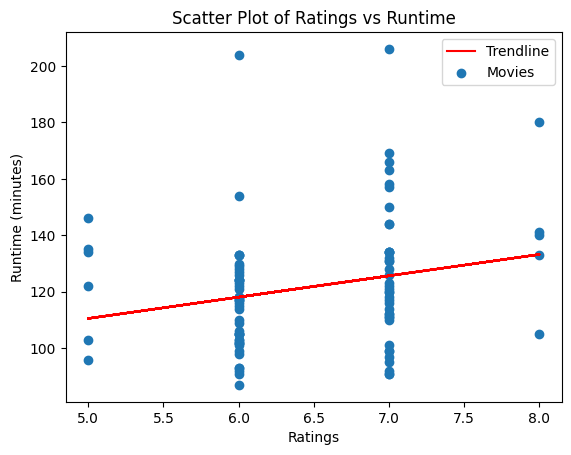

In [37]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re

data = pd.read_csv('moviesdataset_2023.csv')

runtime = data['runtime']
runtime_list = []
for time in runtime:
  extracted_numbers = list(map(int, re.findall(r'\d+', str(time))))
  runtime_list.extend(extracted_numbers)
# print(runtime_list)
  
# converts float dtype into interger and removes any string
ratings = pd.to_numeric(data['rating'].astype(str).str.replace(',', ''), errors='coerce')

# removes NaN before coverting the series into list
ratings = ratings.dropna().astype(int)          
ratings_list = ratings.tolist()
approx_ratings = []

for rating in ratings:
  approx_ratings.append(round(rating))
print(approx_ratings)

min_length = min(len(approx_ratings), len(runtime_list))

final_ratings = approx_ratings[:min_length]
final_runtime = runtime_list[:min_length]


print(final_ratings)
print(final_runtime)

# Create a trendline using numpy.polyfit
trendline = np.polyfit(final_ratings, final_runtime, 1)
trendline_values = np.polyval(trendline, final_ratings)

plt.plot(final_ratings, trendline_values, label='Trendline', color='red')
plt.scatter(final_ratings, final_runtime, label='Movies')
# Add labels and title
plt.xlabel('Ratings')
plt.ylabel('Runtime (minutes)')
plt.title('Scatter Plot of Ratings vs Runtime')

# Display legend
plt.legend()

# Show the plot
plt.show()


In [107]:
data
from matplotlib import pyplot as plt

rating_column = pd.to_numeric(data['rating'].astype(str).str.replace(',', ''), errors='coerce')
ratings_list = rating_column.to_list()

movie_column = data['name']
movie_list = movie_column.to_list()

dataFrame = pd.DataFrame({"movies" : movie_list, "ratings" : ratings_list})
dataFrame

min_rating = 6
min_rating_list = []
index_list = []

for index, row in dataFrame.iterrows():
    rating = row['ratings']  # Access the 'ratings' column in the row
    movie = row['movies']    # Access the 'movies' column in the row

    if rating <= min_rating:
        min_rating_list.append(rating)
        index_list.append(movie)

print(min_rating_list)
print(index_list)

# plt.barh(min_rating_list , index_list)
# plt.show()

[5.9, 5.4, 5.4, 6.0, 5.5, 6.0, 6.0, 6.0, 5.7, 5.8]
['Pathaan', '57 Seconds', 'Apocalypse Clown', 'Infinity Pool', 'Inside', 'Blue Beetle', 'Shazam! Fury of the Gods', 'Aquaman and the Lost Kingdom', 'Rebel Moon - Part One: A Child of Fire', 'Fast X']
